In [1]:
# this documentation makes use of pandas, numpy, and palettable
import pandas as pd
import numpy as np
import palettable
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
#plt.rcParams["font.family"] = "arial" # if you don't have arial it will fall back to Deja Vu

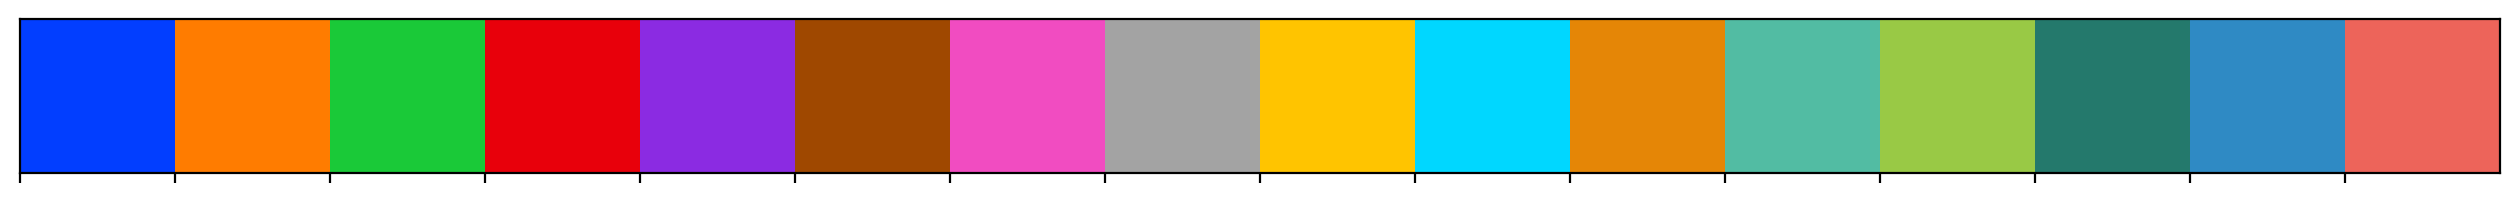

In [2]:
import seaborn as sns
import palettable
import pandas as pd
import seaborn as sns
import numpy as np
vivid_10 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
bright = sns.palettes.color_palette('bright', 10)

bright.append(vivid_10[0])
bright.append(vivid_10[2])
bright.append(vivid_10[3])
bright.append(vivid_10[5])
bright.append(vivid_10[7])
bright.append(vivid_10[9])

sns.palplot(bright)
#sns.palplot(vivid_10)


In [3]:
tab10 = sns.palettes.color_palette('tab10', 10)
tab10

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [4]:
from umap import UMAP
mp = UMAP(n_components=1, n_neighbors=5, random_state = 128)
order = mp.fit_transform(bright)
idx = pd.Series(order.reshape(-1,)).sort_values(ascending=False).index
colors = np.array(bright)[idx]

/home/was966/micromamba/envs/responder/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


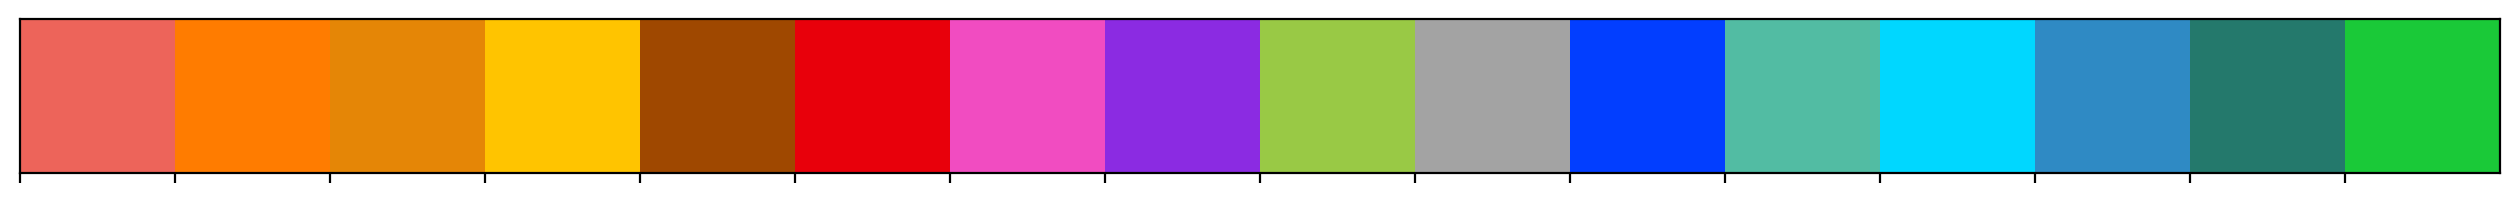

In [5]:
sns.palplot(colors)

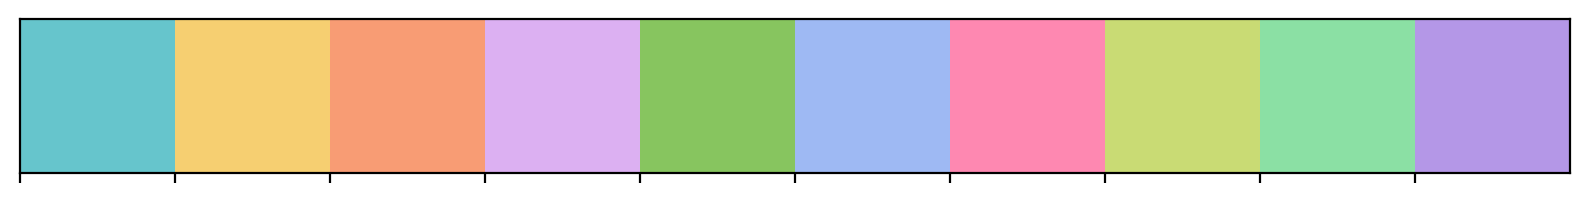

In [6]:
Safe_9 = palettable.cartocolors.qualitative.Pastel_10.mpl_colors
sns.palplot(Safe_9)

In [7]:
from comut import comut
from comut import fileparsers

In [8]:
dfp = pd.read_pickle('../00_data/ITRP.PATIENT.TABLE')
dfp.loc[dfp.cohort == 'MGH', 'RECIST'] = np.nan
dfp.loc[dfp.ICI_map == 'Uknow', 'ICI_map'] = 'NA'
dfp.loc[dfp.ICI_map == 'Other', 'ICI_map'] = 'Other_comb'

drug_name_map = {'Atezo':'Atezo', 'Pembro':'Pembro', 'Nivo':'Nivo', 
                 'Ipi':'Ipi', 'Ipi+Pembro':'Ipi+Nivo/Pembro', 'Ipi+Nivo':'Ipi+Nivo/Pembro',
                 'Other_comb':'Other_comb', 'NA':'NA', }

dfp.ICI_map = dfp.ICI_map.map(drug_name_map)

dfp = dfp.sort_values(['cancer_type', 'cohort', 'sequencer', 'response_label', 'ICI_target_map', 
                       'ICI_map',    'RECIST',  'Biopsy_site', ])


In [9]:
cancer = dfp[['cancer_type']]
cancer = cancer.rename(columns={'cancer_type': 'value'})
cancer['category'] = 'Cancer'
cancer['sample'] = range(len(cancer))

In [10]:
cohort = dfp[['cohort']]
cohort = cohort.rename(columns={'cohort': 'value'})
cohort['category'] = 'Cohort'
cohort['sample'] = range(len(cohort))

In [11]:
drug = dfp[['ICI_map']]
drug = drug.rename(columns={'ICI_map': 'value'})
drug['category'] = 'Drug'
drug['sample'] = range(len(drug))

target = dfp[['ICI_target_map']]
target = target.rename(columns={'ICI_target_map': 'value'})
target['category'] = 'Target'
target['sample'] = range(len(target))

tissue = dfp[['Biopsy_site']].fillna('NA')
tissue = tissue.rename(columns={'Biopsy_site': 'value'})
tissue['category'] = 'Biopsy site'
tissue['sample'] = range(len(tissue))

sequencer = dfp[['sequencer']]
sequencer = sequencer.rename(columns={'sequencer': 'value'})
sequencer['category'] = 'Sequencer'
sequencer['sample'] = range(len(sequencer))

recist = dfp[['RECIST']].fillna('NA')
recist = recist.rename(columns={'RECIST': 'value'})
recist['category'] = 'RECIST'
recist['sample'] = range(len(recist))


response = dfp[['response_label']]
response = response.rename(columns={'response_label': 'value'})
response['category'] = 'Response'
response['sample'] = range(len(response))

In [12]:
drug.value.value_counts().index

Index(['Atezo', 'Pembro', 'Nivo', 'Ipi+Nivo/Pembro', 'Ipi', 'NA',
       'Other_comb'],
      dtype='object', name='value')

In [13]:
color_nan = '#cccccc'
recist_order = ['PD', 'SD', 'PR', 'CR', 'NA']
recist_color = [colors[0], colors[2],colors[-1], colors[-3],  color_nan]
recist_map = dict(zip(recist_order , recist_color))

In [14]:
response_order = ['R', 'NR']
cm = sns.palettes.color_palette('tab10', 4)
response_color =  [cm[0], cm[1]] #[bright[-2], bright[-1]]
response_map = dict(zip(response_order ,response_color))

cohort_order = [
                
 'Hugo',
 'Riaz',
 'Gide',
 'MGH',
 'Liu',
 'Allen',

    'SU2CLC2',
 'SU2CLC1',

    
 'IMmotion150',
 'Choueiri',
 'Miao',

 'IMVigor210',
 'Rose',
 'Snyder',
                
 'Zhao',

         
 'Kim']

import colorcet as cc
cohort_color = sns.color_palette(cc.glasbey, n_colors= len(cohort_order))


cohort_map = dict(zip(cohort_order, cohort_color))



cancer_order = ['SKCM', 'KIRC', 'BLCA', 'GBM', 'STAD', 'LUAD', 'LUSC']

cancer_color = sns.color_palette("bright")
cancer_map = dict(zip(cancer_order, cancer_color))



drug_order = [ 'Nivo', 'Pembro', 'Atezo', 'Ipi', 'Ipi+Nivo/Pembro', 'Other_comb', 'NA']
drug_color = [colors[0], colors[3], '#00af89', colors[7],  colors[-3],  colors[9], color_nan]
drug_map = dict(zip(drug_order, drug_color))


target_order = [ 'PD1',  'PD1+CTLA4', 'PDL1',  'CTLA4', 'Other']
target_color = [colors[0], colors[3], '#00af89', colors[7],  colors[9]]
target_map = dict(zip(target_order, target_color))


sequencer_order = ['HiSeq2000', 'HiSeq2500', 'HiSeq2000/2500', 'HiSeq4000', 'NovaSeq6000']
sequencer_color = Safe_9 #[colors[0], colors[3], colors[1], colors[6],  colors[-6]]
sequencer_map = dict(zip(sequencer_order, sequencer_color))


tissue_order = ['Bladder','Skin','Kidney', 'Lymph node','Ureter',
                'Brain', 'Other', 'Lung', 'Mucosa', 'Ocular', 
                'Liver', 'Soft tissue','NA']
tissue_color = bright[-7:]
tissue_color.extend(bright[:5])
tissue_color.append(color_nan)



tissue_map = dict(zip(tissue_order, tissue_color))


In [15]:
figsize = (15,6)

x_padding = 0.0 # the x distance between patches in comut
y_padding = 0.03 # the y distance between patches in comut
tri_padding = 0.03 # the distance between triangles in comut

hspace = 0.05

([<matplotlib.axis.XTick at 0x7f95ba2c3dc0>,
 [Text(0, 0, '0'),
  Text(100, 0, '100'),
  Text(200, 0, '200'),
  Text(300, 0, '300'),
  Text(400, 0, '400'),
  Text(500, 0, '500'),
  Text(600, 0, '600'),
  Text(700, 0, '700'),
  Text(800, 0, '800'),
  Text(900, 0, '900'),
  Text(1000, 0, '1000'),
  Text(1100, 0, '1100')])

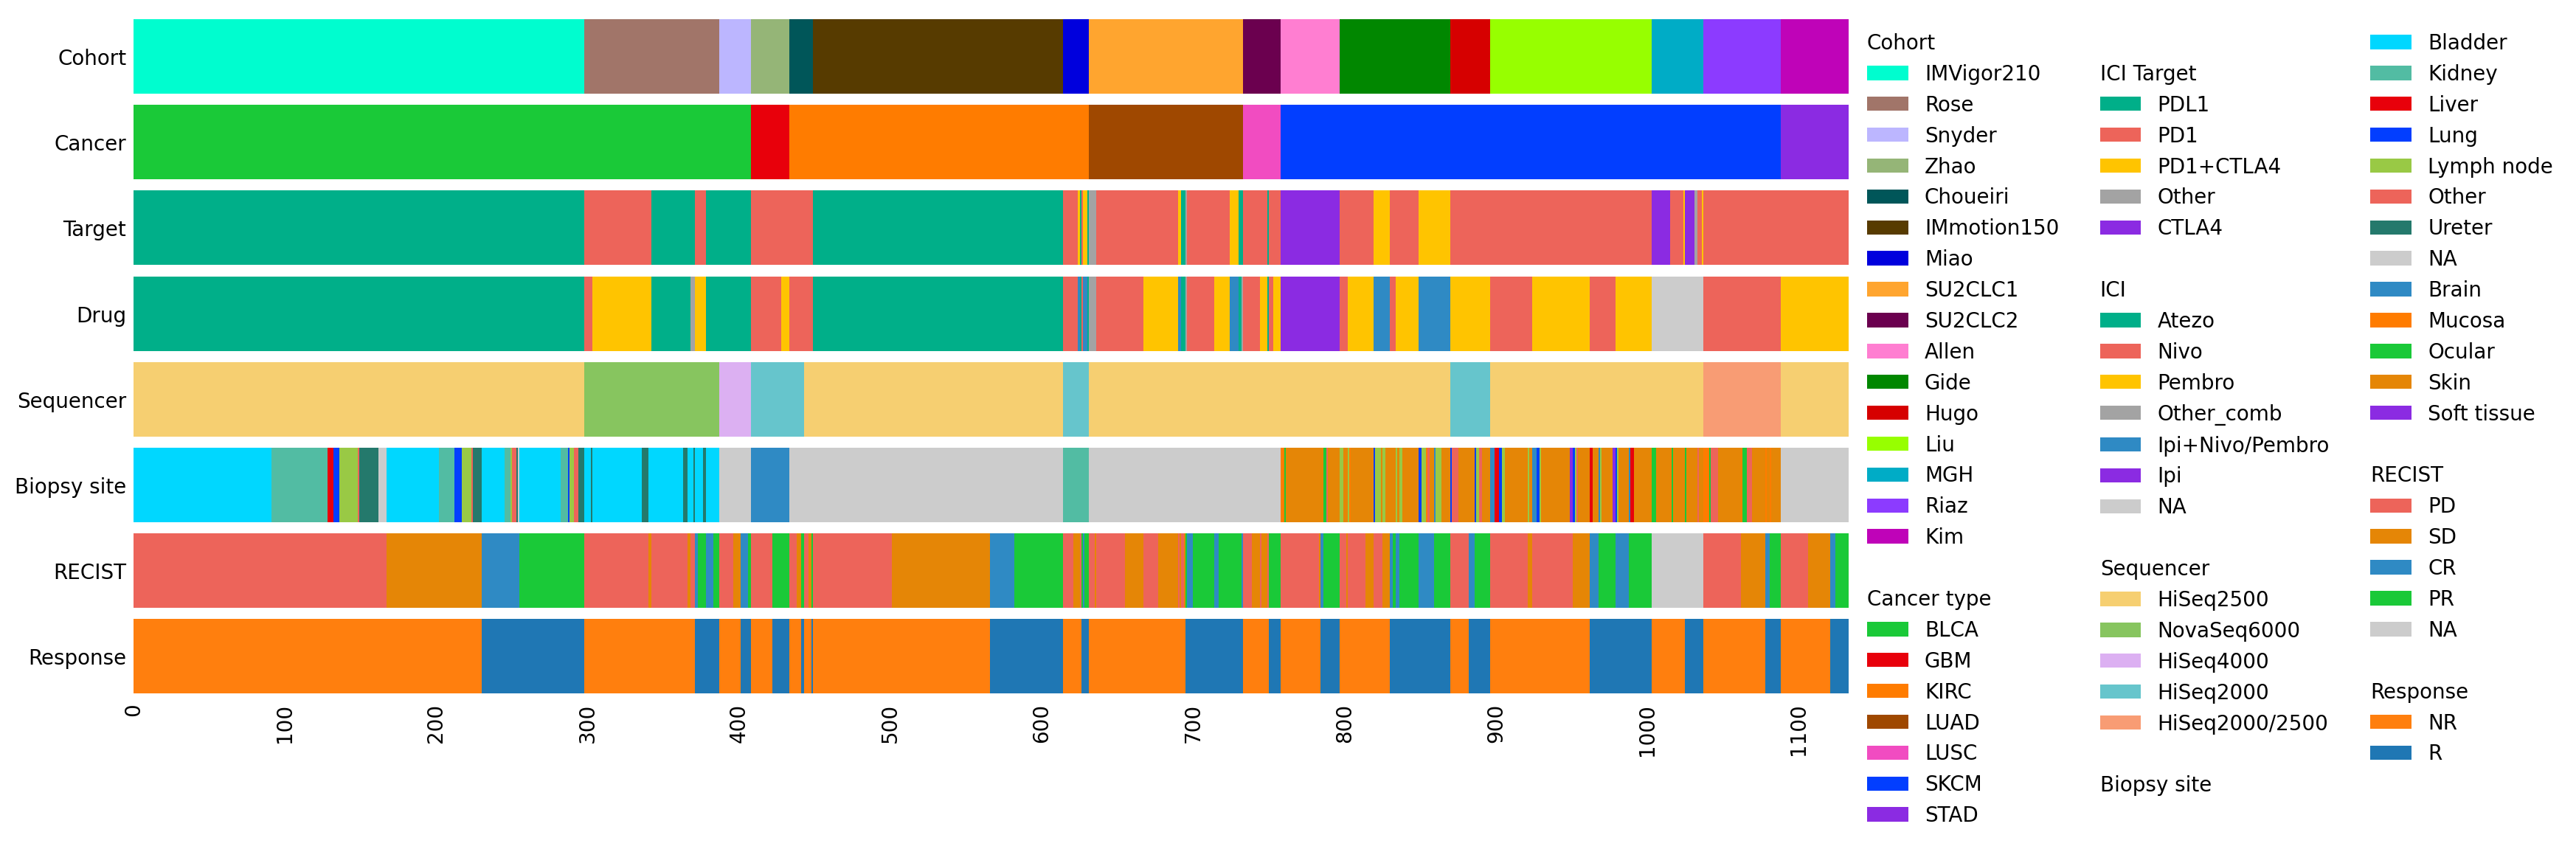

In [16]:
recist = recist[recist.value != 'Unknown']
tissue = tissue[tissue.value != 'Unknown']

toy_comut = comut.CoMut()

toy_comut.add_categorical_data(response, name = 'Response', mapping = response_map, value_order = response_order)

toy_comut.add_categorical_data(recist, name = 'RECIST', mapping = recist_map, value_order=recist_order)

toy_comut.add_categorical_data(tissue, name = 'Biopsy site', mapping = tissue_map, value_order = tissue_order)

toy_comut.add_categorical_data(sequencer, name = 'Sequencer', mapping = sequencer_map, value_order = sequencer_order)

toy_comut.add_categorical_data(drug, name = 'ICI', mapping = drug_map, value_order = drug_order)

toy_comut.add_categorical_data(target, name = 'ICI Target', mapping = target_map, value_order = target_order)

toy_comut.add_categorical_data(cancer, name = 'Cancer type', mapping = cancer_map, value_order = cancer_order)


toy_comut.add_categorical_data(cohort, name = 'Cohort', mapping=cohort_map, value_order = cohort_order)



toy_comut.plot_comut(x_padding = x_padding, y_padding = y_padding, tri_padding = tri_padding, hspace = hspace, figsize=figsize)
toy_comut.add_unified_legend( ncol= 3)

# toy_comut.add_axis_legend(name = 'Cohort', order = cohort_order,
#                         title = 'Cohort', ncol = 2, 
#                         columnspacing = 0.01)


# toy_comut.add_axis_legend(name = 'Response', order = response_order,
#                         title = 'Response', ncol = 2, bbox_to_anchor = (1, 2), columnspacing = 0.6)

# toy_comut.add_axis_legend(name = 'RECIST', order = recist_order,
#                         title = 'RECIST', ncol = 1, bbox_to_anchor = (1, 1),)


# toy_comut.add_axis_legend(name = 'Cancer type', order = cancer_order,
#                         title = 'Cancer type', ncol = 1, bbox_to_anchor = (1.25, 2), ) #


# toy_comut.add_axis_legend(name = 'Biopsy site', order = tissue_order,
#                         title = 'Biopsy site', ) #ncol = 1, bbox_to_anchor = (1, 1),


# # toy_comut.add_axis_legend(name = 'Sequencer', order = sequencer_order,
# #                         title = 'Sequencer', ) #ncol = 1, bbox_to_anchor = (1, 1),

# # toy_comut.add_axis_legend(name = 'ICI Target', order = target_order,
# #                         title = 'Target', ) #ncol = 1, bbox_to_anchor = (1, 1),

# # toy_comut.add_axis_legend(name = 'ICI', order = drug_order,
# #                         title = 'Drug', ) #ncol = 1, bbox_to_anchor = (1, 1),


toy_comut.axes['ICI Target'].set_xticklabels([])

plt.xticks(range(0, len(dfp), 100), range(0, len(dfp), 100))

In [17]:
# toy_comut.axes['Cohort'].xaxis.set_ticks_position('top')

In [ ]:
toy_comut.figure.savefig('mutation_comut_new.pdf', bbox_inches = 'tight')

In [19]:
s = dfp.groupby('cohort').size()

In [20]:
s = s.index+'(n=' + s.astype(str) + ')'

In [21]:
dfp.groupby('response_label').size()

response_label
NR    787
R     346
dtype: int64